# HeartRate Challenge, Loka, inc

## 0. Libraries

### 0.1 Import General libraries

In [1]:
# General libraries
import pandas as pd
import glob
import matplotlib.pyplot as plt
import os
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

print("General libraries imported!")

General libraries imported!


### 0.2 Import libraries of models

In [2]:
# Algorithms use for modeling 
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import xgboost as xgb
print('Algorithm packages imported!')

# Preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn import preprocessing
from sklearn.feature_selection import f_regression
print('Preprocessing packages imported!')

# Model selection packages used for sampling dataset and optimising parameters
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
print('Model selection packages imported!')

Algorithm packages imported!
Preprocessing packages imported!
Model selection packages imported!


## 1. Exploratory Data Analisys - EDA

### 1.1 Load files

In [3]:
df1 = pd.read_csv("./data\P1H1\P1H1.csv")
df2 = pd.read_csv("./data\P1H1\P1H1_ppg.csv")

In [4]:
df1.head()

,Time[ms],HR[bpm]
0,833,170.1492
1,867,171.0000
2,900,170.5263
3,933,170.5263
4,967,170.5263


In [5]:
df2.head()

,B,G,R,Time[ms]
0,118.694126,100.605920,85.949894,0.000000
1,118.694141,100.605874,85.949909,33.333333
2,118.518109,100.596327,85.680738,66.666667
3,118.874861,100.671079,85.932566,100.000000
4,118.908324,100.807634,85.924688,133.333333


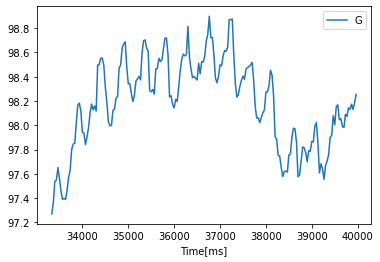

In [10]:

df2.iloc[1000:1200].plot(x="Time[ms]", y="G")
plt.show()

Each oscillation corresponds to a beat, in this way by analyzing only the "Green" channel it would be possible to easily calculate the beats per minute but the "challenge" is to do it with Machine Learning

## Reasoning:

As observed in the two dataframes, we have in both time series, the two time series must be joined in the timestamp column to be able to fulfill the task of estimating the heart rate from the RGB channels.

### 1.2 Preprocessing data

Data Preprocessing includes the steps we need to follow to transform or encode data so that it may be easily parsed by the machine.   The main agenda for a model to be accurate and precise in predictions is that the algorithm should be able to easily interpret the data's features.

#### 1.2.1 Build the complete dataset

In [3]:
def pre_process_data_1(folder, join_field):
    
    """
    function ->   pre_process_data_1    : join two Dataframes and return this one
    
    args     -> 
                  folder (string)       : Directory where the files are
                  join_field (string)   : Field in order to join the two dataframes
                
    return   ->
                  df (Pandas DataFrame) : DataFrame contains register joined (inner) from two DataFrames
    """
    
    try:
    
        file1 = ""
        file2 = ""
        flag = 0
        df = pd.DataFrame()

        for line1 in glob.glob(folder):
            for line2 in glob.glob(line1+"/*"):
                if flag == 0:
                    file1 = line2
                    flag = 1
                else:
                    file2 = line2
                    flag = 0
    
            print(f"Processing... {file1}")
            print(f"Processing... {file2}")
            print("\n")
    
            df1 = pd.read_csv(file1)
            df2 = pd.read_csv(file2)
            df2[join_field] = df2[join_field].apply(round) 
            df = df.append(pd.merge(df1, df2, how='inner', on = join_field))
        
        return df  
    
    except:
        
        print("There is a problem running 'pre_process_data_1' function, please check it")
        return pd.DataFrame()

In [11]:
df = pre_process_data_1("./data/P*", "Time[ms]")

Processing... ./data\P1H1\P1H1.csv
Processing... ./data\P1H1\P1H1_ppg.csv


Processing... ./data\P1LC1\P1LC1.csv
Processing... ./data\P1LC1\P1LC1_ppg.csv


Processing... ./data\P1LC2\P1LC2.csv
Processing... ./data\P1LC2\P1LC2_ppg.csv


Processing... ./data\P1LC3\P1LC3.csv
Processing... ./data\P1LC3\P1LC3_ppg.csv


Processing... ./data\P1LC4\P1LC4.csv
Processing... ./data\P1LC4\P1LC4_ppg.csv


Processing... ./data\P1LC5\P1LC5.csv
Processing... ./data\P1LC5\P1LC5_ppg.csv


Processing... ./data\P1LC6\P1LC6.csv
Processing... ./data\P1LC6\P1LC6_ppg.csv


Processing... ./data\P1LC7\P1LC7.csv
Processing... ./data\P1LC7\P1LC7_ppg.csv


Processing... ./data\P1M1\P1M1.csv
Processing... ./data\P1M1\P1M1_ppg.csv


Processing... ./data\P1M2\P1M2.csv
Processing... ./data\P1M2\P1M2_ppg.csv


Processing... ./data\P1M3\P1M3.csv
Processing... ./data\P1M3\P1M3_ppg.csv


Processing... ./data\P2LC1\P2LC1.csv
Processing... ./data\P2LC1\P2LC1_ppg.csv


Processing... ./data\P2LC2\P2LC2.csv
Processing... ./dat

We delete df1 and df2 in order to save memory

In [12]:
# Delete df1 and df2
del df1
del df2

In [13]:
print(f"Our Dataset has {len(df)} registers")

Our Dataset has 112306 registers


In [14]:
df.head()

,Time[ms],HR[bpm],B,G,R
0,833,170.1492,118.713464,100.516494,85.998388
1,867,171.0000,118.456966,100.447096,85.646363
2,900,170.5263,118.777442,100.306610,85.946232
3,933,170.5263,118.269341,100.038271,85.591496
4,967,170.5263,118.618421,100.034746,85.851989


#### 1.2.2 Handling null values

The real-world data often has a lot of missing values. The cause of missing values can be data corruption or failure to record data. The handling of missing data is very important during the preprocessing of the dataset as many machine learning algorithms do not support missing values.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112306 entries, 0 to 5379
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Time[ms]  112306 non-null  int64  
 1   HR[bpm]   112306 non-null  float64
 2   B         112306 non-null  float64
 3   G         112306 non-null  float64
 4   R         112306 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 5.1 MB


#### There aren't null registers !!!

Now, drop "Time[ms]", We are not going to use it 

In [16]:
df.pop("Time[ms]")

0          833
1          867
2          900
3          933
4          967
         ...  
5375    180000
5376    180033
5377    180067
5378    180100
5379    180133
Name: Time[ms], Length: 112306, dtype: int64

### Plot our Dataset

<AxesSubplot:xlabel='HR[bpm]'>

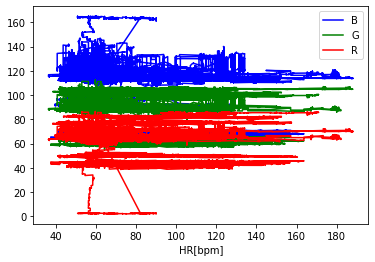

In [17]:
df.plot(x="HR[bpm]", y = ["B","G","R"], color=["blue","green","red"])

Define X and y

In [18]:
X = df[["B", "G", "R"]]
y = df["HR[bpm]"]

#### 1.2.3 Distributions

In Machine Learning, data satisfying Normal Distribution is beneficial for model building. It makes math easier. Models like LDA, Gaussian Naive Bayes, Logistic Regression, Linear Regression, etc., are explicitly calculated from the assumption that the distribution is a bivariate or multivariate normal.

In [19]:
df.describe()

,HR[bpm],B,G,R
count,112306.000000,112306.000000,112306.000000,112306.000000
mean,76.723037,106.174279,89.028998,65.847300
std,24.604340,21.222090,14.358132,13.945522
min,36.363640,59.931076,54.722577,1.956730
25%,59.210530,95.917478,86.751648,61.434665
50%,65.853660,114.233554,93.087028,66.772270
75%,91.525420,118.167982,99.937053,76.370557
max,188.059700,164.970197,112.375061,86.409187


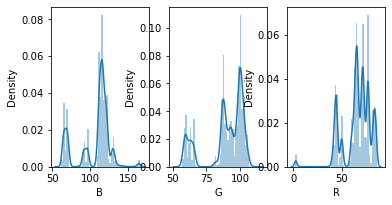

In [20]:
l = ['B', 'G', 'R']
number_of_columns=len(X.columns.values)
number_of_rows = int(len(l)-1/number_of_columns)
plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(X[l[i]],kde=True) 

## Reasoning

In Machine Learning, data satisfying Normal Distribution is beneficial for model building. It makes math easier. Models like LDA, Gaussian Naive Bayes, Logistic Regression, Linear Regression, etc., are explicitly calculated from the assumption that the distribution is a bivariate or multivariate normal.

The distributions we obtained do not appear to be normal distributions, so the regression algorithms may not do a good job.

#### 1.2.4 Handling duplicate values

It is possible that there are equal records (duplicates) but they will not be taken as such because it may be the case that there are equal measurements.

#### 1.2.5 Handling outliers
As in any data science project, it is necessary to identify if there are outliers, for this a function is built to serve this purpose.
After identifying them, different actions could be taken such as eliminating them, changing their value by the mean or by the mode, but in this case, since I do not know what the policy to follow will be, I will only identify them.

In [4]:
# Function to detect anomalies (outliers), in our case with more than 3 standard deviations
def find_anomalies(data):
    
    """
    function ->   find_anomalies         : examine anomalies data
    
    args     -> 
                  data (pandas dataframe): Directory where the files are
                  
    return   ->   anomalies (list)       : list of anomalies                
                  no_anomalies (list)    : list with NO anomalies           
                  
    """

    try:
    
        anomalies = []
        no_anomalies = []

        #We set the upper and lower limit to 2 standard deviations
        data_std = data.std()
        data_mean = data.mean()
        anomaly_cut_off = data_std * 2
        lower_limit  = data_mean - anomaly_cut_off 
        upper_limit = data_mean + anomaly_cut_off
        print(f"Lower limit: {lower_limit.iloc[0]}")
        print(f"Upper limit: {upper_limit.iloc[0]}")

        # Generate outliers
        for index, row in data.iterrows():
            outlier = row # Obtain first column
            if (outlier.iloc[0] > upper_limit.iloc[0]) or (outlier.iloc[0] < lower_limit.iloc[0]):
                anomalies.append((index, outlier))
            else:
                no_anomalies.append((index, outlier))
        return ((anomalies, no_anomalies))
    
    except:
        
        print("There is a problem using 'find_anomalies' functio, please check it")
        return (([],[]))   

#### Handling outliers for "B"

In [22]:
anomalies_B, no_anomalies_B = find_anomalies(df.set_index('HR[bpm]')[['B']])
print(f"Number of records with anomalies: {len(anomalies_B)}")
print(f"Number of records with NO anomalies: {len(no_anomalies_B)}")

Lower limit: 63.73009833184028
Upper limit: 148.61845891611986
Number of records with anomalies: 1606
Number of records with NO anomalies: 110700


<AxesSubplot:xlabel='B'>

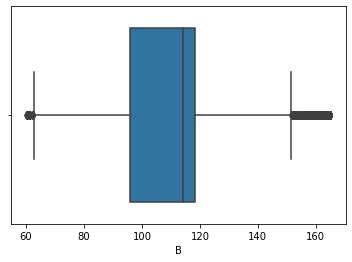

In [23]:
sns.boxplot(df['B'])

#### Handling outliers for "G"

In [24]:
anomalies_G, no_anomalies_G = find_anomalies(df.set_index('HR[bpm]')[['G']])
print(f"Number of records with anomalies: {len(anomalies_G)}")
print(f"Number of records with NO anomalies: {len(no_anomalies_G)}")

Lower limit: 60.31273413853434
Upper limit: 117.74526259731927
Number of records with anomalies: 9089
Number of records with NO anomalies: 103217


<AxesSubplot:xlabel='G'>

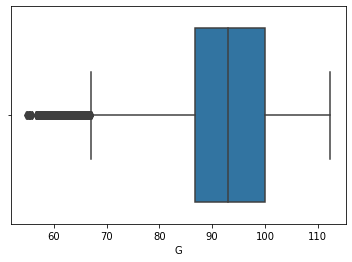

In [25]:
sns.boxplot(df['G'])

#### Handling outliers for "R"

In [26]:
anomalies_R, no_anomalies_R = find_anomalies(df.set_index('HR[bpm]')[['R']])
print(f"Number of records with anomalies: {len(anomalies_R)}")
print(f"Number of records with NO anomalies: {len(no_anomalies_R)}")

Lower limit: 37.95625585881695
Upper limit: 93.73834490859329
Number of records with anomalies: 1264
Number of records with NO anomalies: 111042


<AxesSubplot:xlabel='R'>

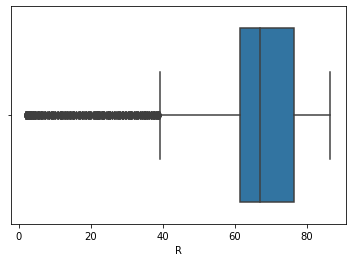

In [27]:
sns.boxplot(df['R'])

## Reasoning:
We have outliers in the three characteristics, in "B", "G" and "R", I will only report them, I will not eliminate them and I will not give them special treatment (such as assigning the mean or mode) because I do not know if these values can be taken as normal or if they really are outliers since I don't know the science behind the photoplethysmogram (PPG) measurement process.

#### 1.2.6 Normalization
For many Machine Learning algorithms used in Data Science to work better, the input variables to the algorithm must be normalized. Normalize means, in this case, to compress or extend the values of the variable so that they are in a defined range, in our case it will be from 0 to 1.

In [28]:
min_max_scaler = preprocessing.MinMaxScaler()
features = ["B","G","R"]
X[features] = min_max_scaler.fit_transform(X[features])

In [29]:
X.head()

,B,G,R
0,0.559624,0.794310,0.995136
1,0.557182,0.793106,0.990967
2,0.560233,0.790669,0.994518
3,0.555396,0.786015,0.990318
4,0.558719,0.785953,0.993402


#### Ready! we have the normalized numeric variables

#### 1.2.7 Correlation

Correlation explains how one or more variables are related to each other. These variables can be input data features which have been used to forecast our target variable.

<AxesSubplot:>

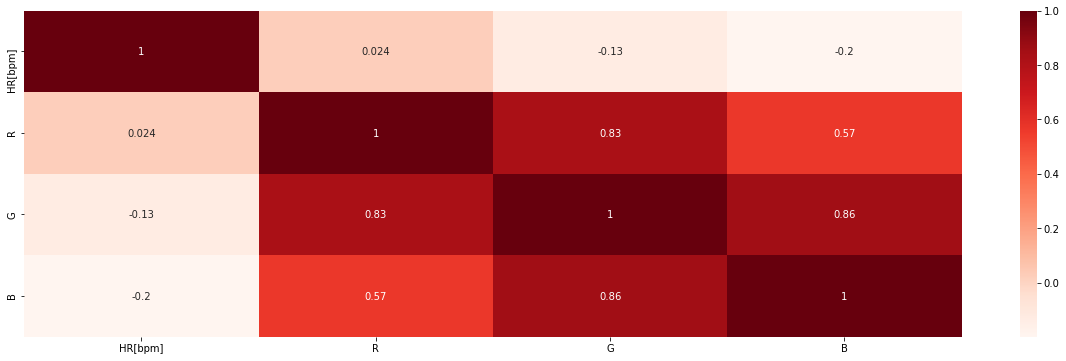

In [30]:
k = len(df.columns) # Número de variables para el heatmap
cols = df.corr().nlargest(k, 'HR[bpm]')['HR[bpm]'].index
cm = df[cols].corr()
plt.figure(figsize=(21,6))
sns.heatmap(cm, annot=True, cmap = 'Reds')

## Reasoning

The correlation that we have obtained between the "HR[bpm]" field and the variables was with the "R" field: 0.024, that does not serve as a predictor variable, let us remember that for one variable to be correlated with another, there must be a correlation with a value close to 1.

It is very possible that these variables do not help us to correctly predict the "HR[bpm]" field.

#### 1.2.8 Features selection

Feature selection is the process of reducing the number of input variables when developing a predictive model. It is desirable to reduce the number of input variables to both reduce the computational cost of modeling and, in some cases, to improve the performance of the model.

In [31]:
# Aplicamos SelectKBest para extraer las mejores características
bestfeatures = SelectKBest(score_func=f_regression, k='all')

seleccion = ["B","G","R"]
fit = bestfeatures.fit(X[features],y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X[features].columns)

# Concatenamos los 2 dataframes para una mejor visualización 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  
print("\nBEST FEATURES (from 0-98)")
print("=========================\n")
print(featureScores.nlargest(20,'Score'))  # Desplegamos las mejores características


BEST FEATURES (from 0-98)

  Specs        Score
0     B  4615.362788
1     G  2005.288965
2     R    65.181524


This is contradictory, the variable best correlated with the field to be predicted ("HR[bpm]") is the one that obtained the lowest score in our search for the best characteristics.

Since we don't have anything clear, we are going to use all the variables.

## 2. Model, Training and Test

### 2.1 Separation of the training and test set

The train-test split procedure is used to estimate the performance of machine learning algorithms when they are used to make predictions on data not used to train the model.

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [33]:
print(f"Data Training: {len(X_train)}")
print(f"Data Test: {len(X_test)}")

Data Training: 89844
Data Test: 22462


In [34]:
del df

### 2.2 Training Models with Default Parameters
We are going to carry out the construction, training and testing of the model to predict the PPm, for them we will use not one but seven different models that are:

- ElasticNet
- Lasso
- GradientBoostingRegressor
- Bayesian Ridge
- LassoLarsIC
- RandomForestRegressor
- XGB Regressor

## Question
Now, why did we choose these models to train and test which one will be the best?

## Reasoning

Because the variable we have to predict ("HR[bpm") is continuous, we must therefore choose regression algorithms for our tests.

In [32]:
zero = 0

# Algorithm selection 
models = [ElasticNet(), Lasso(), GradientBoostingRegressor(), 
          BayesianRidge(), LassoLarsIC(), RandomForestRegressor(), 
          xgb.XGBRegressor()]

# Ramdomising the cross validation samples
shuff = ShuffleSplit(n_splits = 5, test_size =.2, random_state=42)

# Table to compare model accuracy 
columns = ['Name', 'Train Accuracy Mean', 'Test Accuracy']
before_model_compare = pd.DataFrame(columns = columns)

# Indexing through models and saving performance in a table
row_index = zero
percent = 100 

for alg in models:

    model_name = alg.__class__.__name__
    before_model_compare.loc[row_index, 'Name'] = model_name
    alg.fit(X_train, y_train)
    
    training_results = np.sqrt((-cross_val_score(alg, \
                                                 X_train, y_train, \ 
                                                 cv = shuff, \ 
                                                 scoring= 'neg_mean_squared_error')).mean())
    
    test_results = np.sqrt((np.square((y_test-alg.predict(X_test)))).mean())
    before_model_compare.loc[row_index, 'Train Accuracy Mean'] = np.multiply(training_results, percent)
    before_model_compare.loc[row_index, 'Test Accuracy'] = np.multiply(test_results, percent)
    row_index+=1
    print(row_index, alg.__class__.__name__, 'trained!')

decimals = 3
before_model_compare['Train Accuracy Mean'] = before_model_compare['Train Accuracy Mean'].apply(lambda x: round(x, decimals))
before_model_compare['Test Accuracy'] = before_model_compare['Test Accuracy'].apply(lambda x: round(x, decimals))
before_model_compare

1 ElasticNet trained!
2 Lasso trained!
3 GradientBoostingRegressor trained!
4 BayesianRidge trained!
5 LassoLarsIC trained!
6 RandomForestRegressor trained!
7 XGBRegressor trained!


,Name,Train Accuracy Mean,Test Accuracy
0,ElasticNet,2466.657,2475.048
1,Lasso,2471.211,2479.834
2,GradientBoostingRegressor,1927.067,1931.366
3,BayesianRidge,2374.179,2385.679
4,LassoLarsIC,2374.176,2385.679
5,RandomForestRegressor,1724.471,1698.460
6,XGBRegressor,1769.001,1759.260


## Reasoning

The best accuracy is given by RandomForestRegressor because it is the one that shows the lowest value in the error calculation, however the model is far from being optimized, we are going to create hyperparameters and see what gridsearch can do.

### 2.3 Applying Grid-Search

A model hyperparameter is a characteristic of a model that is external to the model and whose value cannot be estimated from data. 

The value of the hyperparameter has to be set before the learning process begins. 
In contrast, a parameter is an internal characteristic of the model and its value can be estimated from data. 

Grid-search is used to find the optimal hyperparameters of a model which results in the most ‘accurate’ predictions.

In [44]:
# List of models 
models = [ElasticNet(), Lasso(), GradientBoostingRegressor(), 
          BayesianRidge(), LassoLarsIC(), RandomForestRegressor(), 
          xgb.XGBRegressor()]

# Setting parameter-values for each model
EN_param_grid = {'alpha': [1e-3, 0.0005], 'copy_X': [True], 
                 'l1_ratio': [0.6, 0.9], 'fit_intercept': [True], 
                 'normalize': [False],'precompute': [False], 
                 'max_iter': [300], 'tol': [1e-3], 
                 'selection': ['random'], 'random_state': [None]}

LASS_param_grid = {'alpha': [5e-4, 0.0001], 'copy_X': [True], 
                   'fit_intercept': [True], 'normalize': [False], 
                   'precompute': [False],'max_iter': [300], 
                   'tol': [1e-2], 'selection': ['random'], 
                   'random_state': [None]}

GB_param_grid = {'loss': ['huber'], 'learning_rate': [0.1, 0.05], 
                 'n_estimators': [300], 'max_depth': [3, 4], 
                 'min_samples_split': [2.5e-3], 
                 'min_samples_leaf': [5, 15]}

BR_param_grid = {'n_iter': [200], 'tol': [1e-5, 1e-6], 
                 'alpha_1': [1e-8, 1e-6], 'alpha_2': [5e-6, 5e-4], 
                 'lambda_1': [5e-6, 5e-4],'lambda_2': [1e-8, 1e-6], 
                 'copy_X': [True]}

LL_param_grid = {'criterion': ['aic'], 'normalize': [True], 
                 'max_iter': [100], 'copy_X': [True], 
                 'precompute': ['auto'], 'eps': [1e-6]}

RFR_param_grid = {'n_estimators': [50], 'max_features': ['auto'], 
                  'max_depth': [None], 'min_samples_split': [5], 
                  'min_samples_leaf': [2]}

XGB_param_grid = {'max_depth': [3], 'learning_rate': [0.1, 0.05], 
                  'n_estimators': [300], 'booster': ['gbtree'], 
                  'gamma': [zero, 0.0468], 'reg_alpha': [0.1, 0.4640], 
                  'reg_lambda': [0.7, 0.8571], 'max_delta_step': [zero], 
                  'min_child_weight': [1, 1.7817], 
                  'colsample_bytree': [.5, 0.4603],
                  'colsample_bylevel': [0.2], 'scale_pos_weight': [1]}

# List of parameters-grid 
params_grid = [EN_param_grid, LASS_param_grid, GB_param_grid, 
               BR_param_grid, LL_param_grid, RFR_param_grid, 
               XGB_param_grid]

Now, We are going to train our models

In [45]:
# Train models
after_model_compare = pd.DataFrame(columns = columns)
row_index = zero

for alg in models:  
    
    gs_alg = GridSearchCV(alg, param_grid = params_grid[zero], cv = shuff, scoring = 'neg_mean_squared_error', n_jobs=-1)
    params_grid.pop(zero)
    model_name = alg.__class__.__name__
    after_model_compare.loc[row_index, 'Name'] = model_name
    gs_alg.fit(X_train, y_train)
    gs_best = gs_alg.best_estimator_
    
    after_training_results = np.sqrt(-gs_alg.best_score_)
    after_test_results = np.sqrt((np.square(y_test-gs_alg.predict(X_test))).mean()) 
    after_model_compare.loc[row_index, 'Train Accuracy Mean'] = np.multiply(after_training_results, percent)
    after_model_compare.loc[row_index, 'Test Accuracy'] = np.multiply(after_test_results, percent)
    
    row_index+=1
    print(row_index, alg.__class__.__name__, 'trained!')
    
decimals = 3
after_model_compare['Train Accuracy Mean'] = after_model_compare['Train Accuracy Mean'].apply(lambda x: round(x, decimals))
after_model_compare['Test Accuracy'] = after_model_compare['Test Accuracy'].apply(lambda x: round(x, decimals))
after_model_compare

1 ElasticNet trained!
2 Lasso trained!
3 GradientBoostingRegressor trained!
4 BayesianRidge trained!
5 LassoLarsIC trained!
6 RandomForestRegressor trained!
7 XGBRegressor trained!


,Name,Train Accuracy Mean,Test Accuracy
0,ElasticNet,2374.210,2385.681
1,Lasso,2374.177,2385.679
2,GradientBoostingRegressor,1848.348,1860.415
3,BayesianRidge,2374.179,2385.679
4,LassoLarsIC,2374.176,2385.679
5,RandomForestRegressor,1724.641,1700.771
6,XGBRegressor,1982.244,1993.624


## Reasoning:
As can be seen, the best test accuracy was achieved with RandomForrestRegressor (again) which remained almost the same, second GradientBoostingRegressor and third XGBRegressor which improved appreciably.

The accuracy has increased for almost all other models and therefore the root mean square error has decreased significantly for almost all models after applying grid search.

But in short, the calculated error is very high for all the models (it was already predicted by the distributions we obtained from the data previously, where we saw that they were not normal distributions), so we are going to try another approach: Neural Networks

### 2.4 Neural Networks

Neural networks are well known for classification problems, for example, the question is will it be fruitful if we use them for this regression problem?

#### Important:
- In a regression problem, we seek to predict the output of a continuous value such as "HR[bpm]".

- In contrast in a Classification problem, we seek to select a class from a list of classes (for example, where an image contains an apple or an orange we want to recognize which is the fruit in the image).

#### 2.4.1 Load libraries for Neural Network model

In [6]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Dense, Activation,Dropout
from tensorflow.keras.models import Model

print(tf.__version__)

2.0.0


#### 2.4.2 Construct Deep Neural Network

In [10]:
def build_model():
    
    """
    function ->   build_model :build a neural network model
    
    args     ->  
                  None        : No arguments require
                  
    return   ->
                  model       : builded model
    """
  
    try:
        
        input_layer = Input(shape=(X.shape[1],))
        dense_layer_1 = Dense(512, activation='relu')(input_layer)
        dense_layer_2 = Dense(128, activation='relu')(dense_layer_1)
        dense_layer_3 = Dense(32, activation='relu')(dense_layer_2)
        dense_layer_4 = Dense(8, activation='relu')(dense_layer_3)
        output = Dense(1)(dense_layer_4)

        model = Model(inputs=input_layer, outputs=output)
        opt = tf.keras.optimizers.RMSprop(0.0001)
        #opt = tf.keras.optimizers.SGD(learning_rate=0.0001)
        model.compile(loss="mse", 
                      optimizer= opt,
                      metrics=['mae', 'mse'])  
 
   
        return model
    
    except:
        
        print("There's some problems running 'buil_model' function, please check it")
        return Model()

In [81]:
model = build_model()

In [82]:
model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 3)]               0         
_________________________________________________________________
dense_25 (Dense)             (None, 512)               2048      
_________________________________________________________________
dense_26 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_27 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_28 (Dense)             (None, 8)                 264       
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 9         
Total params: 72,113
Trainable params: 72,113
Non-trainable params: 0
_______________________________________________________

In [83]:
# The patience parameter is the amount of epochs to check for improvement
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

In [84]:
history = model.fit(X.to_numpy(), y.to_numpy(),
                    batch_size=50, 
                    epochs=100, 
                    verbose=1, 
                    validation_split=0.2, 
                    callbacks=[early_stop])

Train on 89844 samples, validate on 22462 samples
Epoch 1/100
89844/89844 [==============================] - 5s 52us/sample - loss: 1643.7018 - mae: 30.4344 - mse: 1643.7001 - val_loss: 2501.4593 - val_mae: 42.0444 - val_mse: 2501.4587
Epoch 2/100
89844/89844 [==============================] - 4s 44us/sample - loss: 513.1110 - mae: 18.0791 - mse: 513.1113 - val_loss: 2127.6654 - val_mae: 37.6389 - val_mse: 2127.6655
Epoch 3/100
89844/89844 [==============================] - 4s 44us/sample - loss: 501.7997 - mae: 17.8417 - mse: 501.7995 - val_loss: 1796.2955 - val_mae: 33.4008 - val_mse: 1796.2958
Epoch 4/100
89844/89844 [==============================] - 4s 40us/sample - loss: 490.2991 - mae: 17.5565 - mse: 490.2992 - val_loss: 1432.2028 - val_mae: 28.6234 - val_mse: 1432.2029
Epoch 5/100
89844/89844 [==============================] - 4s 43us/sample - loss: 476.5995 - mae: 17.1576 - mse: 476.5995 - val_loss: 1165.7807 - val_mae: 25.2966 - val_mse: 1165.7806
Epoch 6/100
89844/89844 [===

In [11]:
def plot_history(history):
    
    """
    function ->   plot_history                    : plot two graph, mse and mae
    
    args     -> 
                  history(tensorflow history var) : histoy of the model trained with tensorflow
                  
    return   ->
                  None                            : Only plot the graph
    """
    
    try:
        
        hist = pd.DataFrame(history.history)
        hist['epoch'] = history.epoch

        plt.figure()
        plt.xlabel('Epoch')
        plt.ylabel('Mean Abs Error [MPG]')
    
        plt.plot(hist['epoch'], hist['mae'],
                 label='Train Error')
    
        plt.plot(hist['epoch'], hist['val_mae'],
                 label = 'Val Error')
        plt.legend()

        plt.figure()
        plt.xlabel('Epoch')
        plt.ylabel('mse')
        plt.plot(hist['epoch'], hist['mse'],
                 label='Mean Squared Error')
        plt.plot(hist['epoch'], hist['val_mse'],
                 label = 'Val MSE')
        plt.legend()
        plt.show()
        
    except:
    
        print("There's some problem running 'plot_history' function, please check it")

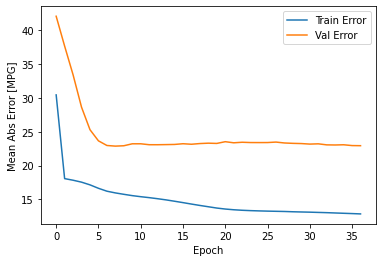

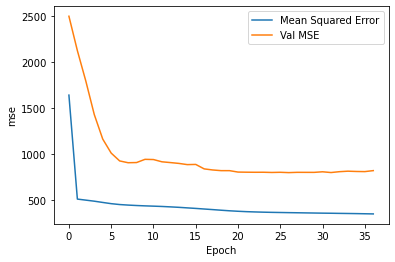

In [89]:
plot_history(history)

In [87]:
loss, mae, mse = model.evaluate(X_test.to_numpy(), y_test.to_numpy(), verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

22462/1 - 1s - loss: 344.5113 - mae: 14.6691 - mse: 455.0779
Testing set Mean Abs Error: 14.67 MPG


## Reasoning

We have obtained better results with neural networks, now the mse is 455 and the mae is 14.66, it is still far from a good result but it is a start that guides us where we should direct our efforts.

#### Important:

- The mean square error (MSE) is a common loss function used for regression problems (different loss functions are used for classification problems).

- Similarly, the evaluation metrics used for regression differ from classification. A common regression metric is the mean absolute error (MAE).

- When numeric input data features have values with different ranges, each feature must be scaled independently to the same range.

#### Remember:
- In regression problem, the goal is to predict a continuous value.

## To summarize what we did:

- We load and process the data set.
- We familiarize ourselves with the data set by plotting some graphs.
- We verified that there were no null values.
- We examine outliers.
- We normalize the data.
- We draw a correlation heat map of the features.
- We chose the features.
- We separate our data set for training and testing.
- We built, trained and tested 7 different Machine Learning models.
- We adjusted hyperparameters with the help of GridSearch and obtained the best model.
- We built, trained and tested a deep neural network with four hidden layers plus one of a neuron (five layers in total).
- Our deep neural network was able to outperform previous models.